In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\swast\\OneDrive\\Desktop\\Projects\\TextEmo_Detection\\emotion_dataset.csv")

In [3]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [4]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

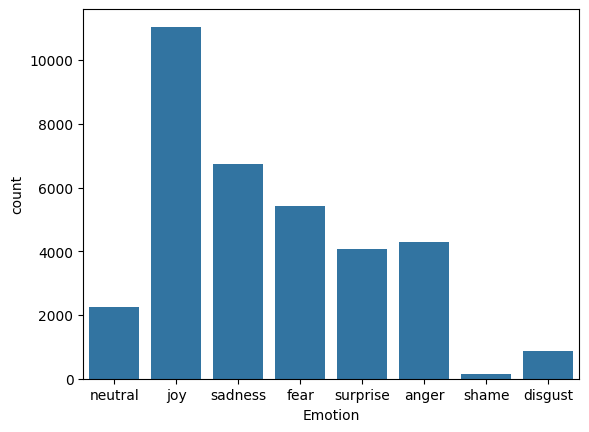

In [5]:
sns.countplot(x='Emotion',data=df)

In [6]:
import neattext.functions as nfx
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)


In [7]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [8]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [9]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [10]:
x = df['Clean_Text']
y = df['Emotion']

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

c:\Users\swast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6196589384939644

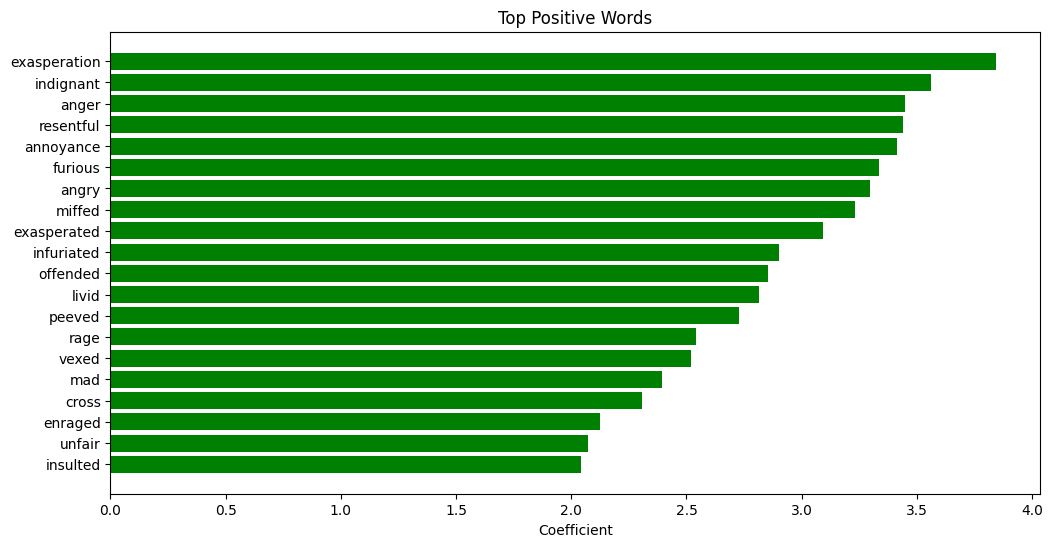

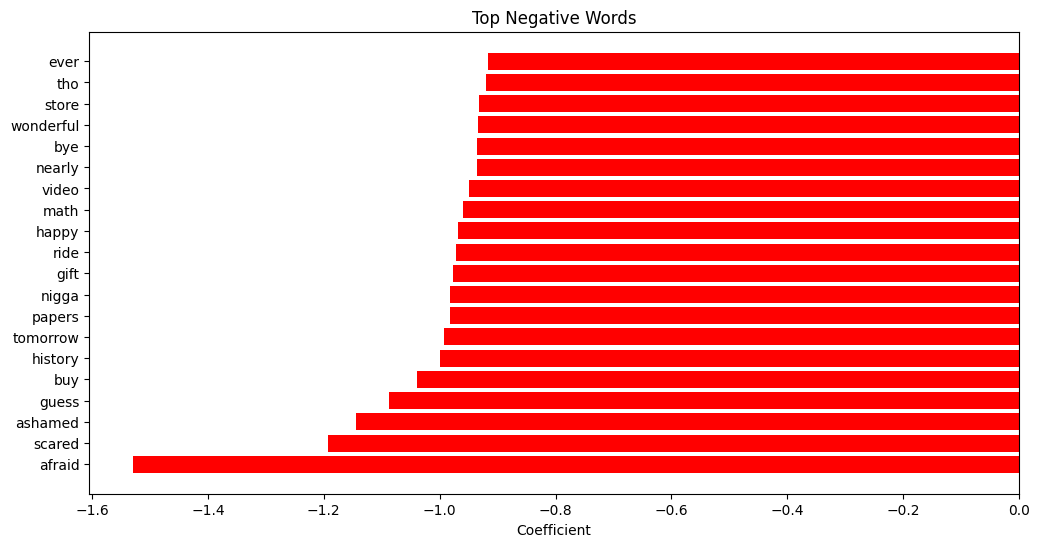

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Get trained model and vectorizer
lr = pipe_lr.named_steps['lr']
vectorizer = pipe_lr.named_steps['cv']

# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefs = lr.coef_[0]  # assuming binary classification

# Sort coefficients
top_n = 20
top_positive_indices = np.argsort(coefs)[-top_n:]
top_negative_indices = np.argsort(coefs)[:top_n]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(np.arange(top_n), coefs[top_positive_indices], color='green')
plt.yticks(np.arange(top_n), feature_names[top_positive_indices])
plt.title("Top Positive Words")
plt.xlabel("Coefficient")
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(np.arange(top_n), coefs[top_negative_indices], color='red')
plt.yticks(np.arange(top_n), feature_names[top_negative_indices])
plt.title("Top Negative Words")
plt.xlabel("Coefficient")
plt.show()


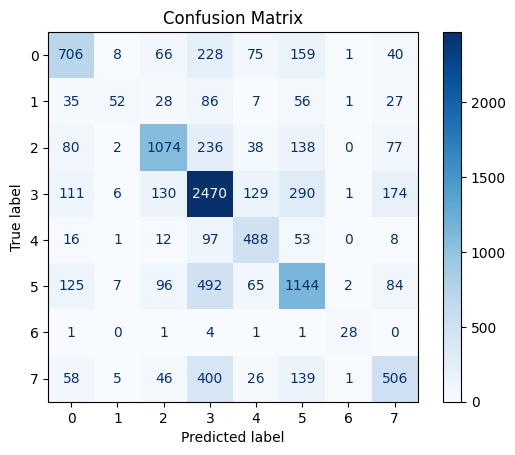

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Predict
y_pred = pipe_lr.predict(x_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


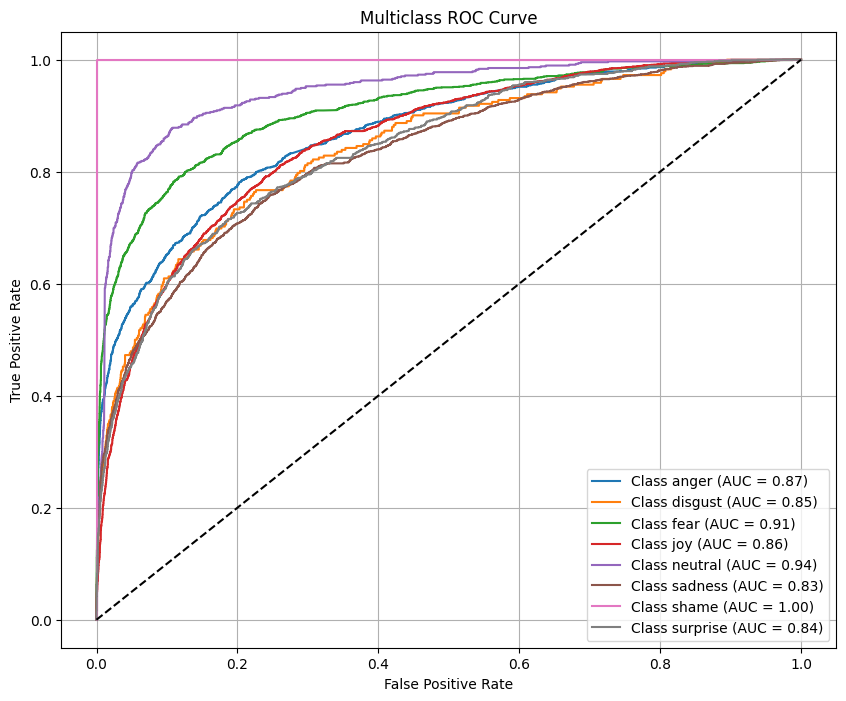

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get class labels
classes = pipe_lr.named_steps['lr'].classes_

# Binarize y_test
y_test_bin = label_binarize(y_test, classes=classes)
y_proba = pipe_lr.predict_proba(x_test)

# Plot ROC for each class
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [25]:
from sklearn.svm import LinearSVC

pipe_svm = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('svc', LinearSVC(C=1.0))  # Much faster!
])


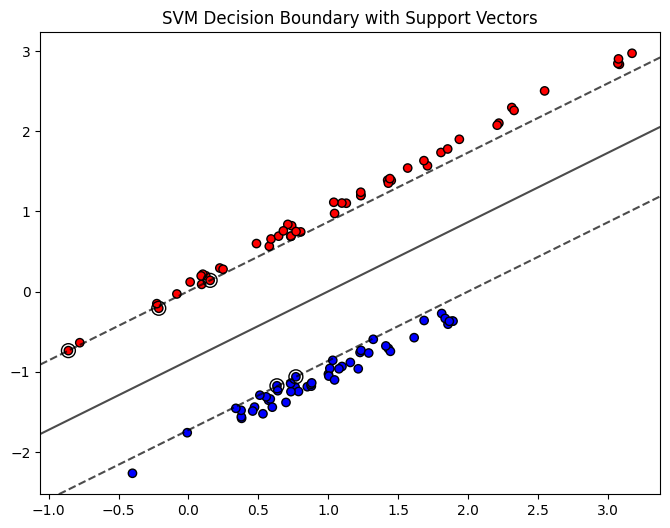

In [26]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Make 2D data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=100, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(*xlim, num=100), np.linspace(*ylim, num=100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot margin and boundary
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title("SVM Decision Boundary with Support Vectors")
plt.show()


In [ ]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipe_rf = Pipeline(steps=[
    ('cv', CountVectorizer()), 
    ('rf', RandomForestClassifier(n_estimators=10))
])

pipe_rf.fit(x_train, y_train)
pipe_rf.score(x_test, y_test)


0.5635179153094463

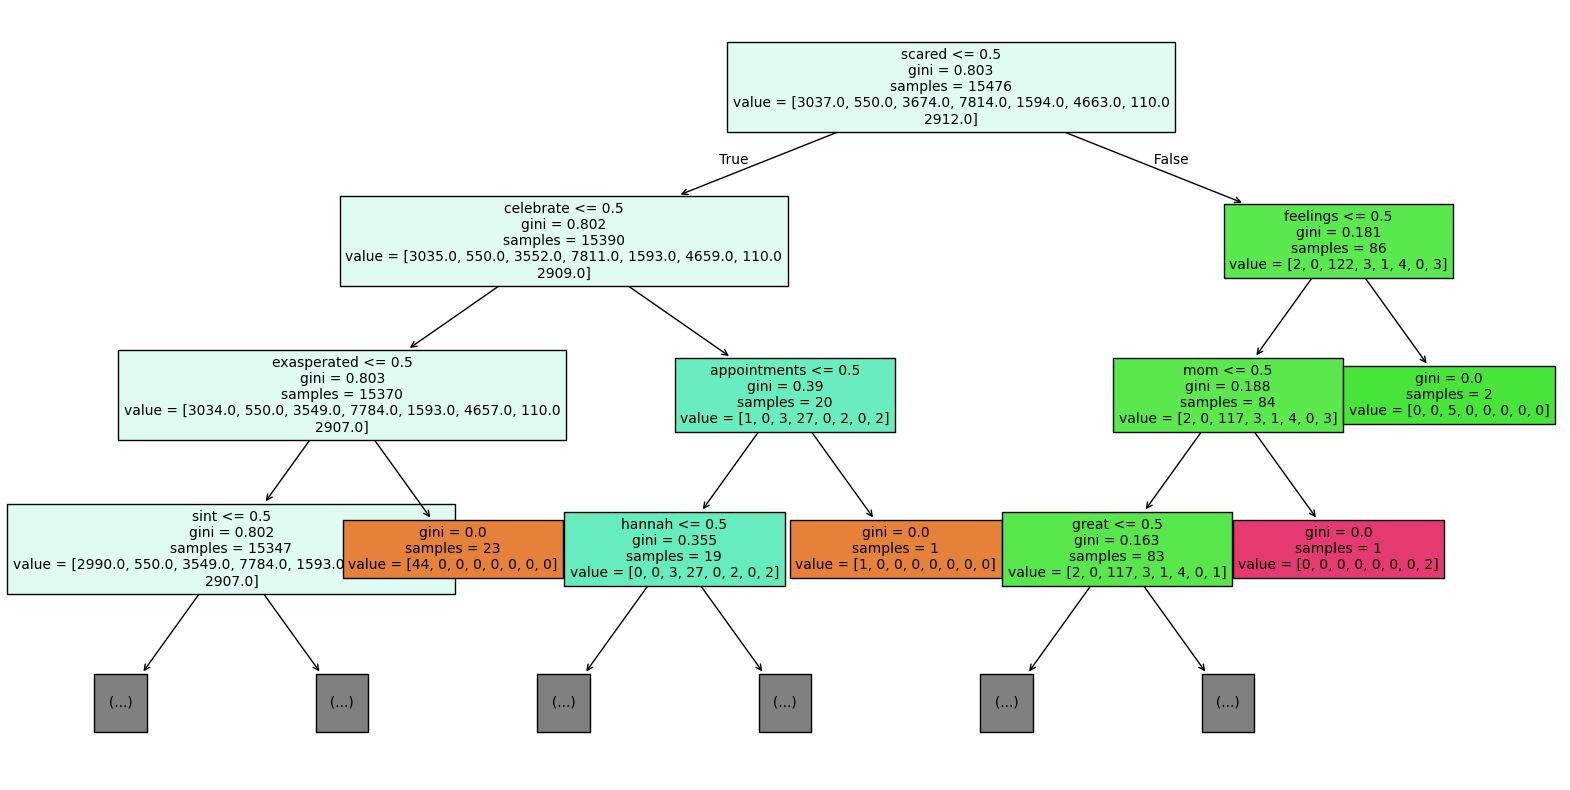

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the first tree from the Random Forest
tree = pipe_rf.named_steps['rf'].estimators_[0]

# Plot it
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, max_depth=3, fontsize=10, feature_names=pipe_rf.named_steps['cv'].get_feature_names_out())
plt.show()


In [22]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()